In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv("./data/ISSI - Sheet1.csv", parse_dates=["Date"])
df = data.copy()
df.head()

,Date,Open,High,Low,Close,Volume
0,2011-05-13 15:00:00,122.95,123.28,122.61,122.95,1212.0
1,2011-05-16 15:00:00,122.03,122.94,121.59,122.03,685780352.0
2,2011-05-18 15:00:00,123.46,123.59,122.07,123.46,981171328.0
3,2011-05-19 15:00:00,123.81,124.16,123.44,123.81,1604.0
4,2011-05-20 15:00:00,124.84,124.84,123.82,124.84,1138.0


In [3]:
df.shape

(2683, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2683 non-null   datetime64[ns]
 1   Open    2683 non-null   float64       
 2   High    2683 non-null   float64       
 3   Low     2683 non-null   float64       
 4   Close   2683 non-null   float64       
 5   Volume  2540 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 125.9 KB


In [5]:
df.isna().sum()

Date        0
Open        0
High        0
Low         0
Close       0
Volume    143
dtype: int64

In [6]:
df.head(15)

,Date,Open,High,Low,Close,Volume
0,2011-05-13 15:00:00,122.95,123.28,122.61,122.95,1212.0
1,2011-05-16 15:00:00,122.03,122.94,121.59,122.03,685780352.0
2,2011-05-18 15:00:00,123.46,123.59,122.07,123.46,981171328.0
3,2011-05-19 15:00:00,123.81,124.16,123.44,123.81,1604.0
4,2011-05-20 15:00:00,124.84,124.84,123.82,124.84,1138.0
5,2011-05-23 15:00:00,122.00,124.79,121.55,122.00,331.0
6,2011-05-24 15:00:00,122.07,122.25,121.47,122.07,2781.0
7,2011-05-25 15:00:00,121.86,122.04,121.31,121.86,307228832.0
8,2011-05-26 15:00:00,123.23,123.44,121.87,123.23,2404.0
9,2011-05-27 15:00:00,123.91,124.10,122.31,123.91,135249040.0


In [7]:
df.tail(5)

,Date,Open,High,Low,Close,Volume
2678,2022-06-27 15:00:00,203.53,204.00,202.15,203.30,0.0
2679,2022-06-28 15:00:00,203.28,203.86,202.41,203.11,0.0
2680,2022-06-29 15:00:00,202.65,203.74,201.89,201.89,0.0
2681,2022-06-30 15:00:00,202.06,203.29,199.48,200.39,0.0
2682,2022-07-01 15:00:00,200.87,201.37,196.72,197.14,0.0


In [8]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.set_index("Date")
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,1212.0
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,685780352.0
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,981171328.0
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,1604.0
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,1138.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2683 entries, 2011-05-13 15:00:00 to 2022-07-01 15:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2683 non-null   float64
 1   High    2683 non-null   float64
 2   Low     2683 non-null   float64
 3   Close   2683 non-null   float64
 4   Volume  2540 non-null   float64
dtypes: float64(5)
memory usage: 125.8 KB


In [10]:
df.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume    143
dtype: int64

In [11]:
df.describe()

,Open,High,Low,Close,Volume
count,2683.000000,2683.000000,2683.000000,2683.00000,2.540000e+03
mean,164.717738,165.603645,163.695785,164.68262,9.044931e+08
std,21.056260,20.998957,21.102087,21.01580,1.622198e+09
min,106.640000,108.030000,103.690000,106.64000,0.000000e+00
25%,147.310000,148.080000,146.450000,147.32500,0.000000e+00
50%,169.130000,170.310000,168.260000,169.18000,0.000000e+00
75%,182.460000,183.515000,181.550000,182.53000,1.023097e+09
max,209.750000,210.320000,208.750000,209.31000,9.467919e+09


In [12]:
df.drop(columns="Volume", inplace=True)

In [13]:
df.describe()

,Open,High,Low,Close
count,2683.000000,2683.000000,2683.000000,2683.00000
mean,164.717738,165.603645,163.695785,164.68262
std,21.056260,20.998957,21.102087,21.01580
min,106.640000,108.030000,103.690000,106.64000
25%,147.310000,148.080000,146.450000,147.32500
50%,169.130000,170.310000,168.260000,169.18000
75%,182.460000,183.515000,181.550000,182.53000
max,209.750000,210.320000,208.750000,209.31000


In [14]:
df[df["Low"] == df["Low"].min()]

,Open,High,Low,Close
Date,,,,
2011-09-26 15:00:00,106.89,111.2,103.69,106.89


In [15]:
df[df["Low"] == df["Low"].max()]

,Open,High,Low,Close
Date,,,,
2022-06-03 15:00:00,209.27,210.32,208.75,209.31


# Plot Analysis

<AxesSubplot: xlabel='Date'>

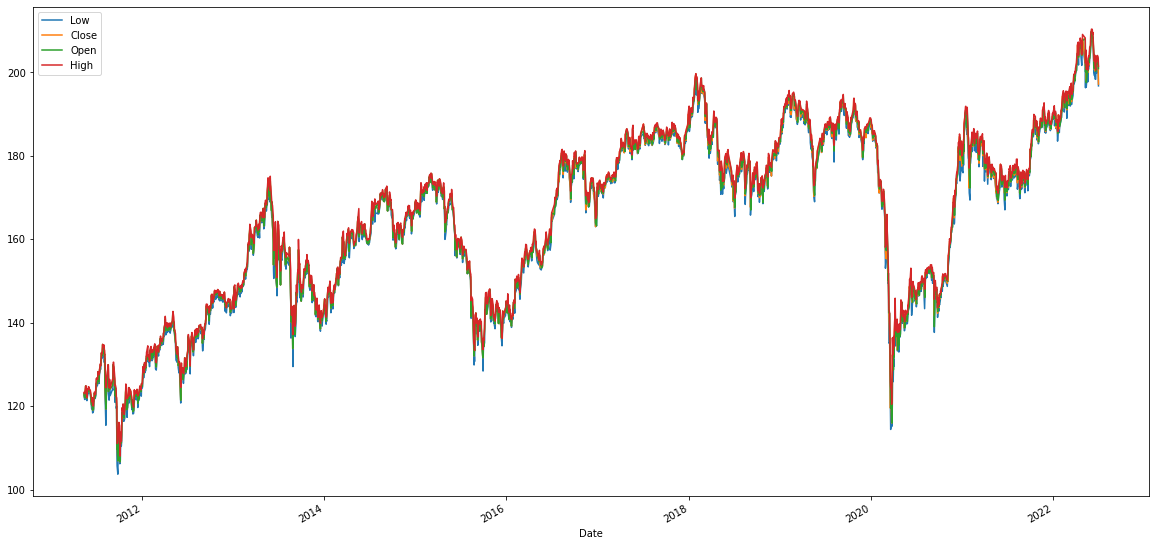

In [16]:
df[["Low", "Close", "Open", "High"]].plot(figsize=(20, 10))

### Terendah ada di 2020 april

(15095.0, 15704.0)

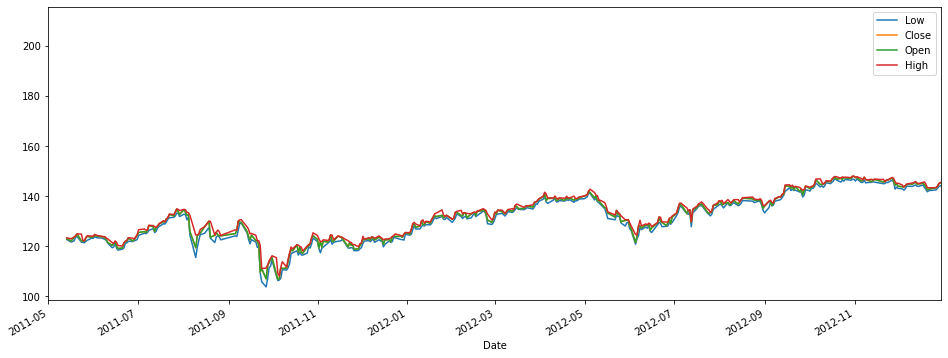

In [17]:
df[["Low", "Close", "Open", "High"]].plot(figsize=(16, 6))
plt.xlim("2011-05-01", "2012-12-30")

(18262.0, 19173.0)

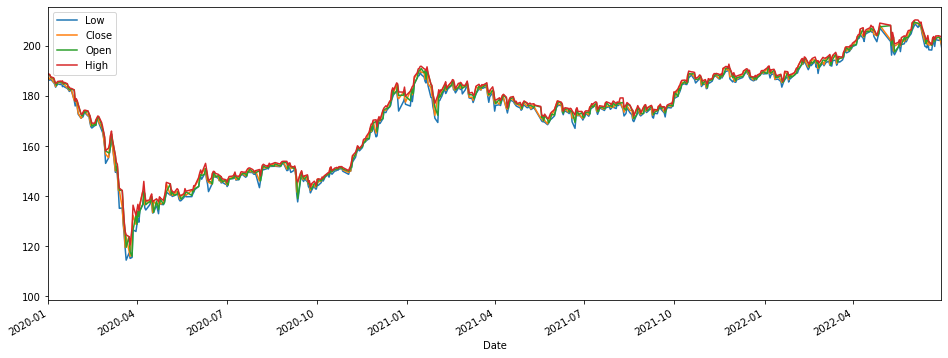

In [18]:
df[["Low", "Close", "Open", "High"]].plot(figsize=(16, 6))
plt.xlim("2020-01-01", "2022-06-30")

### Terendah ada di tahun 2020

In [19]:
df.groupby(df.index.year).mean().T

Date,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Open,122.695695,137.449876,153.740124,160.666888,156.465205,164.132387,181.627511,181.022083,187.701475,154.540456,180.179016,197.873621
High,123.643245,138.033320,154.921328,161.389212,157.398320,164.968230,182.269747,181.956250,188.436557,155.734315,181.165656,198.903190
Low,121.439272,136.518133,152.595062,159.881950,155.656762,163.213004,180.946835,179.921875,186.734508,153.180871,178.940533,196.574741
Close,122.695695,137.449876,153.743320,160.669336,156.465205,164.150617,181.625738,180.966208,187.608566,154.456183,180.037705,197.798448


<AxesSubplot: xlabel='Date'>

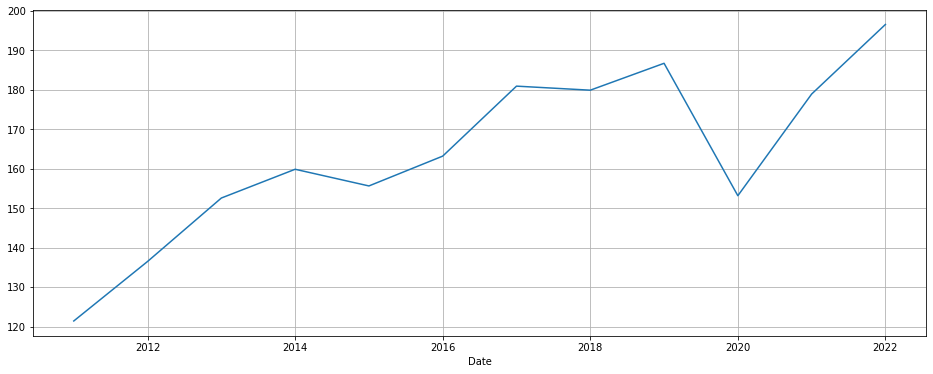

In [20]:
df["Low"].groupby(df.index.year).mean().plot(kind="line", figsize=(16, 6), grid=True)

### Secara rata-rata, ini saham turun ditanggal 3, dan naik tertinggi di tanggal 23

In [21]:
df.sort_values

<bound method DataFrame.sort_values of                        Open    High     Low   Close
Date                                               
2011-05-13 15:00:00  122.95  123.28  122.61  122.95
2011-05-16 15:00:00  122.03  122.94  121.59  122.03
2011-05-18 15:00:00  123.46  123.59  122.07  123.46
2011-05-19 15:00:00  123.81  124.16  123.44  123.81
2011-05-20 15:00:00  124.84  124.84  123.82  124.84
...                     ...     ...     ...     ...
2022-06-27 15:00:00  203.53  204.00  202.15  203.30
2022-06-28 15:00:00  203.28  203.86  202.41  203.11
2022-06-29 15:00:00  202.65  203.74  201.89  201.89
2022-06-30 15:00:00  202.06  203.29  199.48  200.39
2022-07-01 15:00:00  200.87  201.37  196.72  197.14

[2683 rows x 4 columns]>

In [22]:
df["Low"].groupby(df.index.day).mean().sort_values()

Date
27    162.541263
3     162.551798
13    162.558526
1     162.613571
28    162.735778
30    162.750370
20    162.791429
16    162.903846
26    163.232093
6     163.326782
7     163.340000
24    163.438636
29    163.484304
5     163.494138
14    163.581264
11    163.586180
19    163.661319
23    163.687634
10    163.693333
12    163.892529
2     163.937416
4     163.967802
9     164.101494
15    164.459205
21    164.499213
25    164.529048
17    164.585542
8     165.168667
18    165.212889
22    165.423407
31    165.776744
Name: Low, dtype: float64

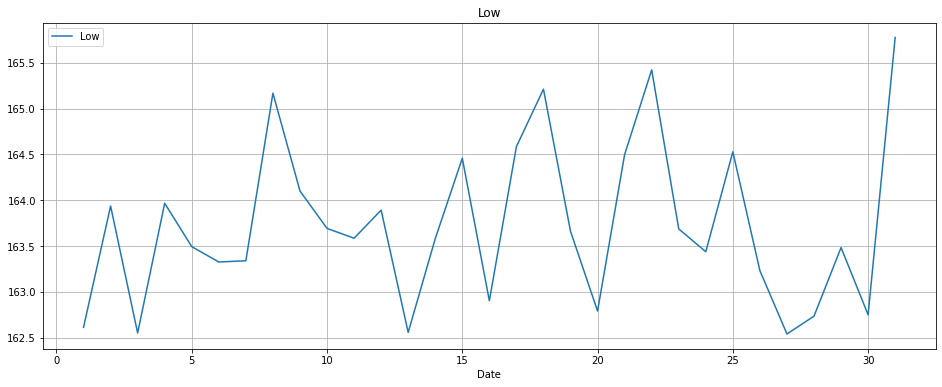

In [23]:
df["Low"].groupby(df.index.day).mean().plot(kind="line", figsize=(16, 6), grid=True, title="Low")
plt.legend(["Low"])

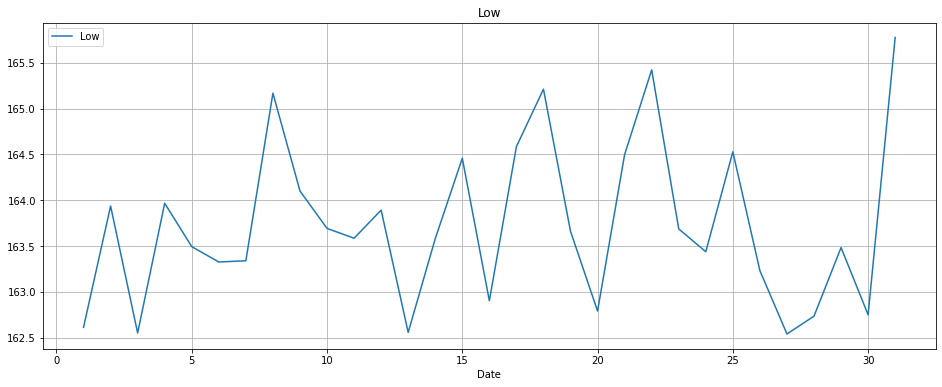

In [24]:
df["Low"].groupby(df.index.day).mean().plot(kind="line", figsize=(16, 6), grid=True, title="Low")
plt.legend(["Low"])

In [25]:
df[df.index.day == 27].mean()

Open     163.580632
High     164.544211
Low      162.541263
Close    163.677263
dtype: float64

In [26]:
df[df.index.day == 31].mean()

Open     167.055116
High     167.946512
Low      165.776744
Close    167.091628
dtype: float64

### Secara rata-rata, saham ini bakal turun terendah itu di bulan 9 dan naik tertinggi di bulan 4

In [27]:
df["Low"].groupby(df.index.month).mean().sort_values()

Date
9     159.395110
6     161.021135
10    161.147839
7     161.373289
11    161.890696
8     162.227661
12    162.505952
5     163.889358
2     167.484836
1     167.495242
3     167.839163
4     168.479364
Name: Low, dtype: float64

<AxesSubplot: title={'center': 'Low'}, xlabel='Date'>

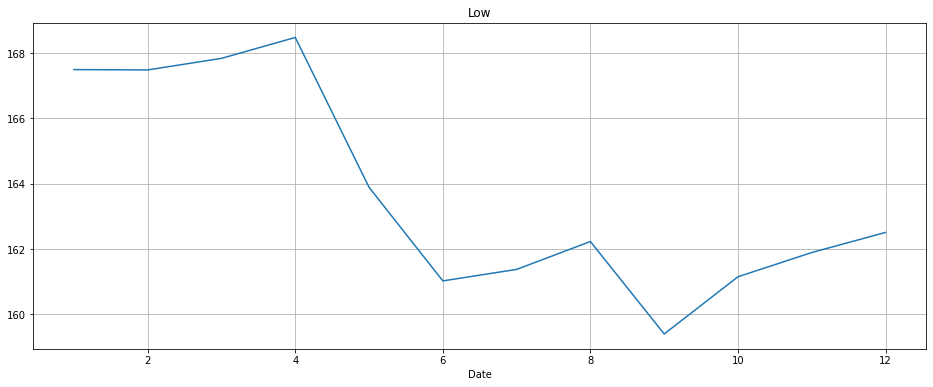

In [28]:
df["Low"].groupby(df.index.month).mean().plot(kind="line", figsize=(16, 6), grid=True, title="Low")

In [29]:
df[df.index.month == 4].mean()

Open     169.474182
High     170.366818
Low      168.479364
Close    169.495818
dtype: float64

In [30]:
df[df.index.month == 9].mean()

Open     160.541189
High     161.488590
Low      159.395110
Close    160.507974
dtype: float64

In [31]:
df_date = data.copy()
date = df_date["Date"].dt
df_date["Day"] = date.day
df_date["weekday"] = (date.weekday)
df_date.head()

,Date,Open,High,Low,Close,Volume,Day,weekday
0,2011-05-13 15:00:00,122.95,123.28,122.61,122.95,1212.0,13,4
1,2011-05-16 15:00:00,122.03,122.94,121.59,122.03,685780352.0,16,0
2,2011-05-18 15:00:00,123.46,123.59,122.07,123.46,981171328.0,18,2
3,2011-05-19 15:00:00,123.81,124.16,123.44,123.81,1604.0,19,3
4,2011-05-20 15:00:00,124.84,124.84,123.82,124.84,1138.0,20,4


In [32]:
df_date["Low"].groupby(df_date["weekday"]).mean().sort_values(ascending=False)

weekday
0    163.878731
3    163.715065
1    163.665373
4    163.613921
2    163.606575
Name: Low, dtype: float64

<AxesSubplot: title={'center': 'Low'}, xlabel='weekday'>

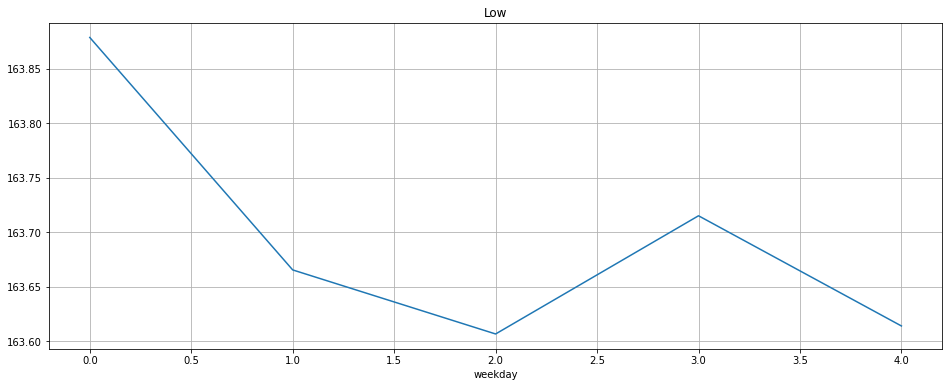

In [33]:
df_date["Low"].groupby(df_date["weekday"]).mean().plot(kind="line", figsize=(16, 6), grid=True, title="Low")

In [34]:
df.skew()

Open    -0.363602
High    -0.360244
Low     -0.380808
Close   -0.366371
dtype: float64

<AxesSubplot: xlabel='Close', ylabel='Density'>

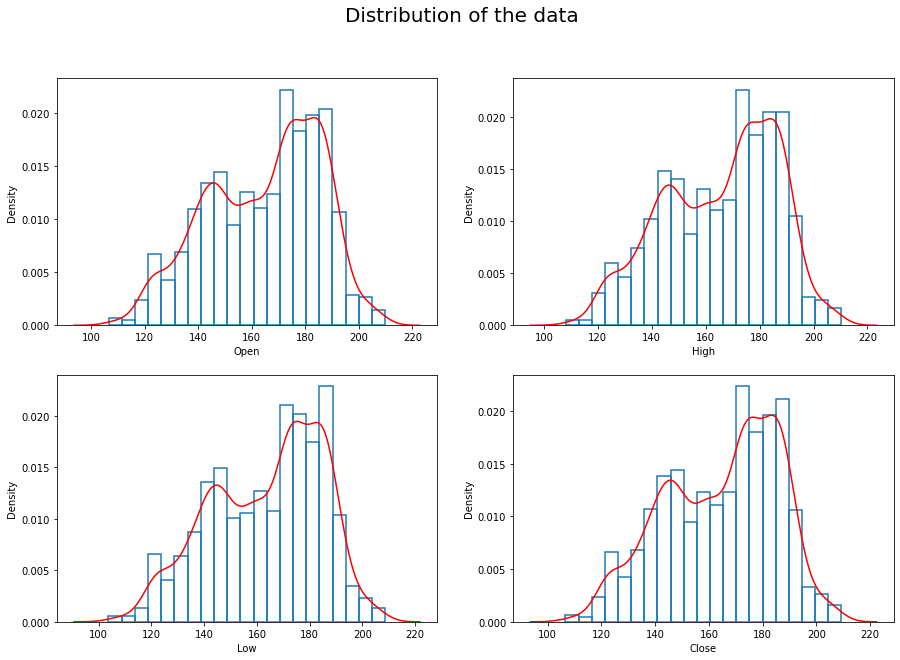

In [35]:
# make plot to see the distribution of the data
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution of the data", fontsize=20)
sns.histplot(df["Open"], ax=ax[0,0], fill=False, stat="density")
sns.kdeplot(df["Open"], ax=ax[0,0], color="red")

sns.histplot(df["High"], ax=ax[0,1], fill=False, stat="density")
sns.kdeplot(df["High"], color="red", ax=ax[0,1])

sns.histplot(df["Low"], ax=ax[1,0], fill=False, stat="density")
sns.kdeplot(df["Low"], color="red", ax=ax[1,0])

sns.histplot(df["Close"], ax=ax[1,1], fill=False, stat="density")
sns.kdeplot(df["Close"], color="red", ax=ax[1,1])

In [36]:
df.describe()

,Open,High,Low,Close
count,2683.000000,2683.000000,2683.000000,2683.00000
mean,164.717738,165.603645,163.695785,164.68262
std,21.056260,20.998957,21.102087,21.01580
min,106.640000,108.030000,103.690000,106.64000
25%,147.310000,148.080000,146.450000,147.32500
50%,169.130000,170.310000,168.260000,169.18000
75%,182.460000,183.515000,181.550000,182.53000
max,209.750000,210.320000,208.750000,209.31000


[(120.0, 210.0)]

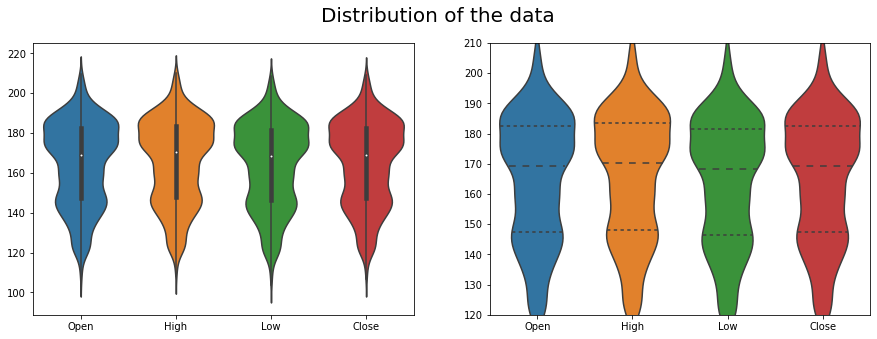

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of the data", fontsize=20)

sns.violinplot(df[["Open", "High", "Low", "Close"]], cmap="coolwarm", ax=ax[0])
sns.violinplot(df[["Open", "High", "Low", "Close"]], inner="quartile", cmap="coolwarm", ax=ax[1]).set(ylim =(120, 210))

<AxesSubplot: >

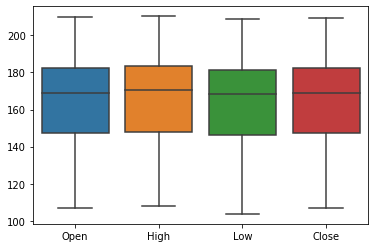

In [64]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# fig.suptitle("Distribution of the data", fontsize=20)

sns.boxplot(df[["Open", "High", "Low", "Close"]])


<AxesSubplot: >

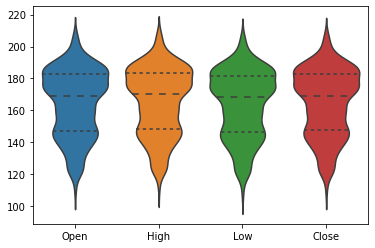

In [61]:
sns.violinplot(df[["Open", "High", "Low", "Close"]], inner="quartile", cmap="coolwarm")

In [38]:
df.corr()

,Open,High,Low,Close
Open,1.000000,0.998992,0.998800,0.998538
High,0.998992,1.000000,0.998504,0.998797
Low,0.998800,0.998504,1.000000,0.999037
Close,0.998538,0.998797,0.999037,1.000000


<AxesSubplot: >

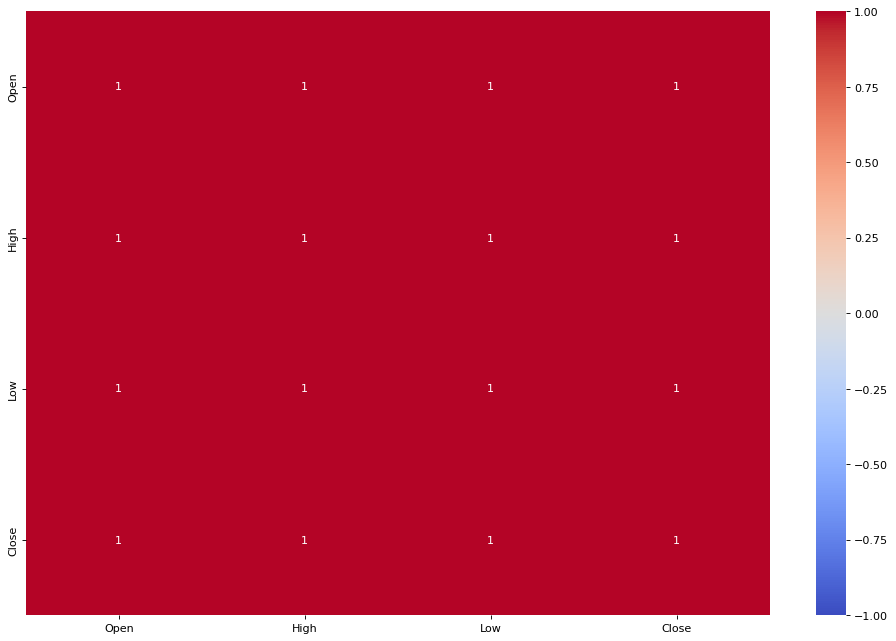

In [39]:
# plot the correlation matrix
plt.figure(figsize=(15, 10), dpi=80)
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)

In [40]:
df.head()

,Open,High,Low,Close
Date,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95
2011-05-16 15:00:00,122.03,122.94,121.59,122.03
2011-05-18 15:00:00,123.46,123.59,122.07,123.46
2011-05-19 15:00:00,123.81,124.16,123.44,123.81
2011-05-20 15:00:00,124.84,124.84,123.82,124.84


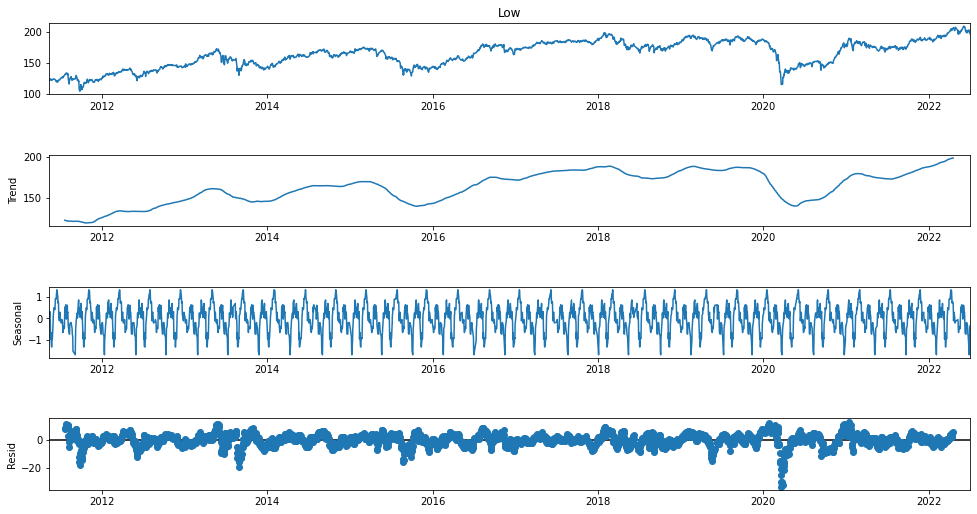

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df["Low"], period=90)
fig = decomp.plot()
fig.set_size_inches(15, 8)

In [42]:
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

# Feature Engineering

In [43]:
df = data.copy()
df.drop(columns="Volume", inplace=True)
df.head()

,Date,Open,High,Low,Close
0,2011-05-13 15:00:00,122.95,123.28,122.61,122.95
1,2011-05-16 15:00:00,122.03,122.94,121.59,122.03
2,2011-05-18 15:00:00,123.46,123.59,122.07,123.46
3,2011-05-19 15:00:00,123.81,124.16,123.44,123.81
4,2011-05-20 15:00:00,124.84,124.84,123.82,124.84


In [44]:
date = df["Date"].dt
df["Day"] = date.day
df["Month"] = date.month

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2683 non-null   datetime64[ns]
 1   Open    2683 non-null   float64       
 2   High    2683 non-null   float64       
 3   Low     2683 non-null   float64       
 4   Close   2683 non-null   float64       
 5   Day     2683 non-null   int64         
 6   Month   2683 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 146.9 KB


In [45]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.set_index("Date")
df.head()

,Open,High,Low,Close,Day,Month
Date,,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,13,5
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,16,5
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,18,5
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,19,5
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,20,5


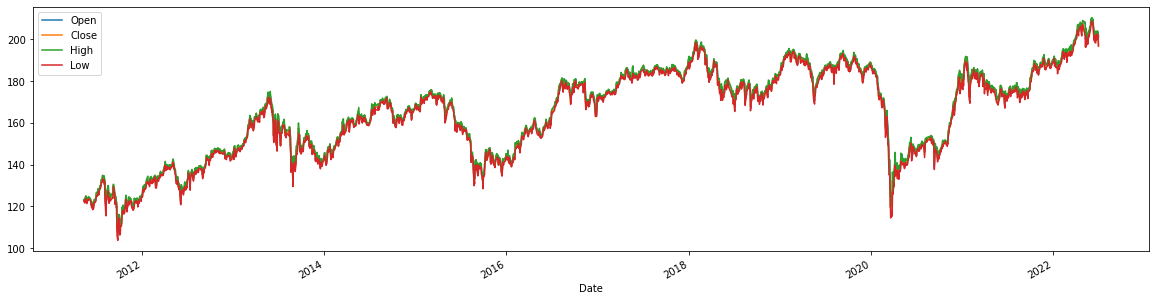

In [46]:
df["Open"].plot(figsize=(20, 5))
df["Close"].plot(figsize=(20, 5))
df["High"].plot(figsize=(20, 5))
df["Low"].plot(figsize=(20, 5))
plt.legend()

### Simple Moving Average

In [47]:
# df["SMA7"] = df["Low"].rolling(7).mean()
# df["SMA30"] = df["Low"].rolling(30).mean()
# df["SMA90"] = df["Low"].rolling(90).mean()
# df["SMA180"] = df["Low"].rolling(180).mean()

# df[["Low", "SMA7", "SMA30", "SMA90", "SMA180"]].plot(figsize=(20, 5))

In [48]:
# df["Low"].plot(figsize=(20, 5), linewidth=2.5, color="red")
# df["SMA7"].plot(figsize=(20, 5))
# df["SMA30"].plot(figsize=(20, 5))
# df["SMA90"].plot(figsize=(20, 5))
# df["SMA180"].plot(figsize=(20, 5), linewidth=1, color="black")
# plt.legend()
# plt.xlim("2019-01-01", "2021-01-01")

In [49]:
df.head()

,Open,High,Low,Close,Day,Month
Date,,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,13,5
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,16,5
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,18,5
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,19,5
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,20,5


# baru sampe sini

### MACD & EMA

In [50]:
def exponential_moving_average(df, window):
    weights = (2 / (window + 1))
    ema = df.copy()
    ema[0] = df.iloc[0]
    for i in range(1, len(df)):
        ema[i] = (df[i] * weights) + (ema[i-1] * (1 - weights))
    return ema

df["EMA12"] = exponential_moving_average(df["Low"], 12)
df["EMA26"] = exponential_moving_average(df["Low"], 26)
df["EMA50"] = exponential_moving_average(df["Low"], 50)
df.head()

,Open,High,Low,Close,Day,Month,EMA12,EMA26,EMA50
Date,,,,,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,13,5,122.610000,122.610000,122.610000
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,16,5,122.453077,122.534444,122.570000
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,18,5,122.394142,122.500041,122.550392
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,19,5,122.555043,122.569668,122.585279
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,20,5,122.749652,122.662285,122.633699


In [51]:
df["MACD"] = df["EMA12"] -  df["EMA26"]  

df.head()

,Open,High,Low,Close,Day,Month,EMA12,EMA26,EMA50,MACD
Date,,,,,,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,13,5,122.610000,122.610000,122.610000,0.000000
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,16,5,122.453077,122.534444,122.570000,-0.081368
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,18,5,122.394142,122.500041,122.550392,-0.105899
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,19,5,122.555043,122.569668,122.585279,-0.014624
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,20,5,122.749652,122.662285,122.633699,0.087367


In [52]:
df.tail()

,Open,High,Low,Close,Day,Month,EMA12,EMA26,EMA50,MACD
Date,,,,,,,,,,
2022-06-27 15:00:00,203.53,204.00,202.15,203.30,27,6,201.582669,202.023527,201.190534,-0.440857
2022-06-28 15:00:00,203.28,203.86,202.41,203.11,28,6,201.709951,202.052154,201.238356,-0.342203
2022-06-29 15:00:00,202.65,203.74,201.89,201.89,29,6,201.737651,202.040143,201.263911,-0.302492
2022-06-30 15:00:00,202.06,203.29,199.48,200.39,30,6,201.390320,201.850503,201.193954,-0.460183
2022-07-01 15:00:00,200.87,201.37,196.72,197.14,1,7,200.671809,201.470465,201.018505,-0.798656


<BarContainer object of 2683 artists>

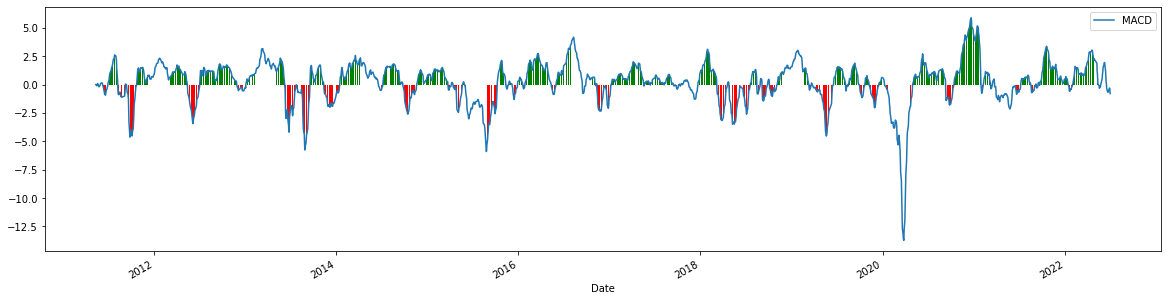

In [53]:
# calculate signal line
df["Signal"] = df["MACD"].ewm(span=9, adjust=False).mean()

# plot MACD
color = np.array(['green']*len(df))
df[["MACD"]].plot(figsize=(20, 5))
color[df["MACD"] <0 ] = 'red'
plt.bar(df.index, df["MACD"], color=color)

<AxesSubplot: xlabel='Date'>

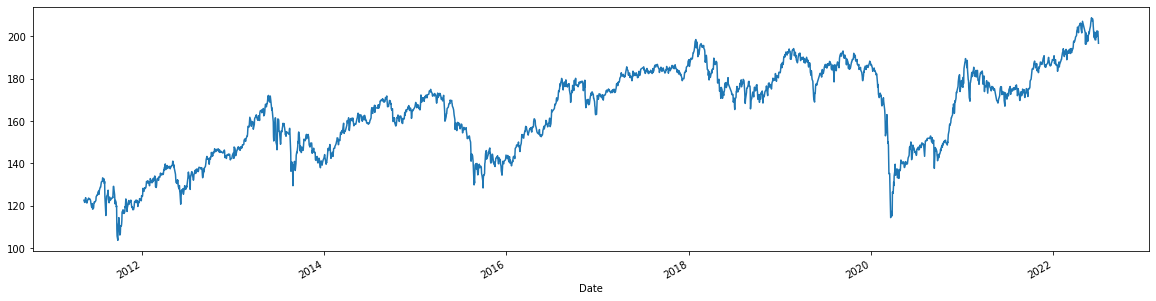

In [54]:
df["Low"].plot(figsize=(20, 5))

In [55]:
# color = np.array(['green']*len(df))
# fig, ax = plt.subplots(figsize=(20, 5))
# color[df["MACD"] <0 ] = 'red'
# plt.bar(df.index, df["MACD"], color=color)
# plt.plot(df.index, df["Signal"], color="blue")
# plt.show()

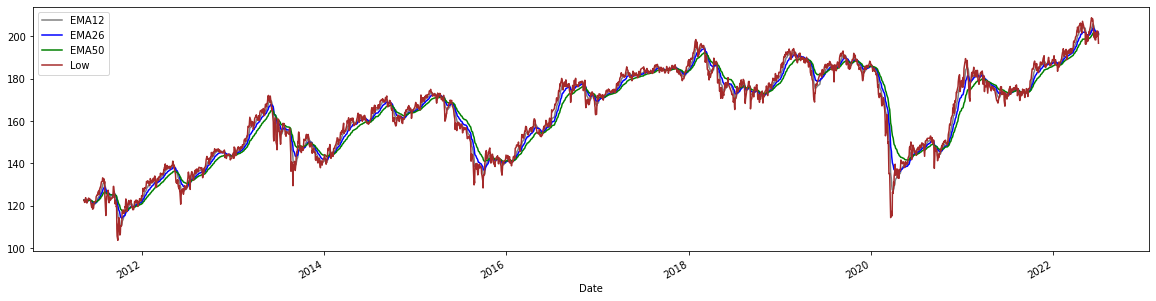

In [56]:
df["EMA12"].plot(figsize=(20, 5), color="grey")
df["EMA26"].plot(figsize=(20, 5), color="blue")
df["EMA50"].plot(figsize=(20, 5), color="green")
df["Low"].plot(figsize=(20, 5), color="brown")
plt.legend()

(17897.0, 18628.0)

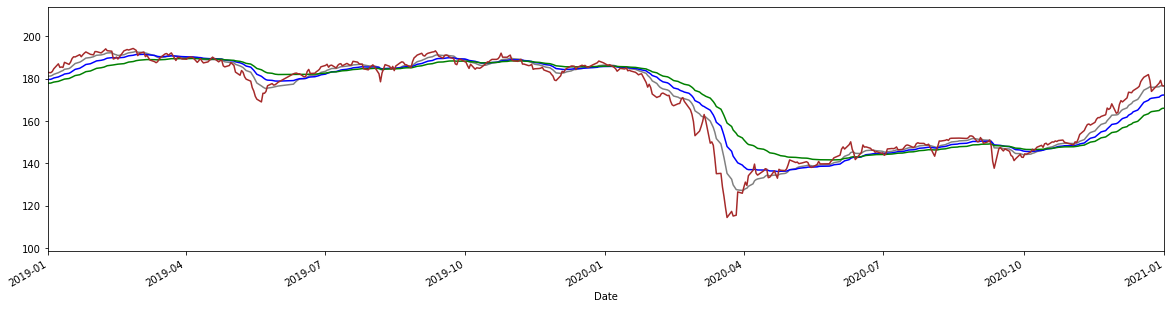

In [57]:
df["EMA12"].plot(figsize=(20, 5), color="grey")
df["EMA26"].plot(figsize=(20, 5), color="blue")
df["EMA50"].plot(figsize=(20, 5), color="green")
df["Low"].plot(figsize=(20, 5), color="brown")
plt.xlim("2019-01-01", "2021-01-01")

# RSI

In [58]:
# # calculate RSI
# delta = df["Low"].diff(1)
# delta = delta.dropna()
# up = delta.clip(lower=0)
# down = -1*delta.clip(upper=0)
# df["up"] = up
# df["down"] = down
# df["avg_up"] = df["up"].ewm(com=13, adjust=False).mean()
# df["avg_down"] = df["down"].ewm(com=13, adjust=False).mean()
# df["RS"] = df["avg_up"] / df["avg_down"]
# df["RSI"] = 100.0 - (100.0 / (1.0 + df["RS"]))

In [59]:
# df["RSI"].plot(figsize=(20, 7))
# plt.plot(df.index, [90]*len(df), color="red", label="overbought")
# plt.plot(df.index, [20]*len(df), color="green", label="oversold")
# plt.legend()

In [60]:
df.head()

,Open,High,Low,Close,Day,Month,EMA12,EMA26,EMA50,MACD,Signal
Date,,,,,,,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,13,5,122.610000,122.610000,122.610000,0.000000,0.000000
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,16,5,122.453077,122.534444,122.570000,-0.081368,-0.016274
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,18,5,122.394142,122.500041,122.550392,-0.105899,-0.034199
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,19,5,122.555043,122.569668,122.585279,-0.014624,-0.030284
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,20,5,122.749652,122.662285,122.633699,0.087367,-0.006754


In [61]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Day       0
Month     0
EMA12     0
EMA26     0
EMA50     0
MACD      0
Signal    0
dtype: int64

In [62]:
df.dropna(inplace=True)

<AxesSubplot: xlabel='Date'>

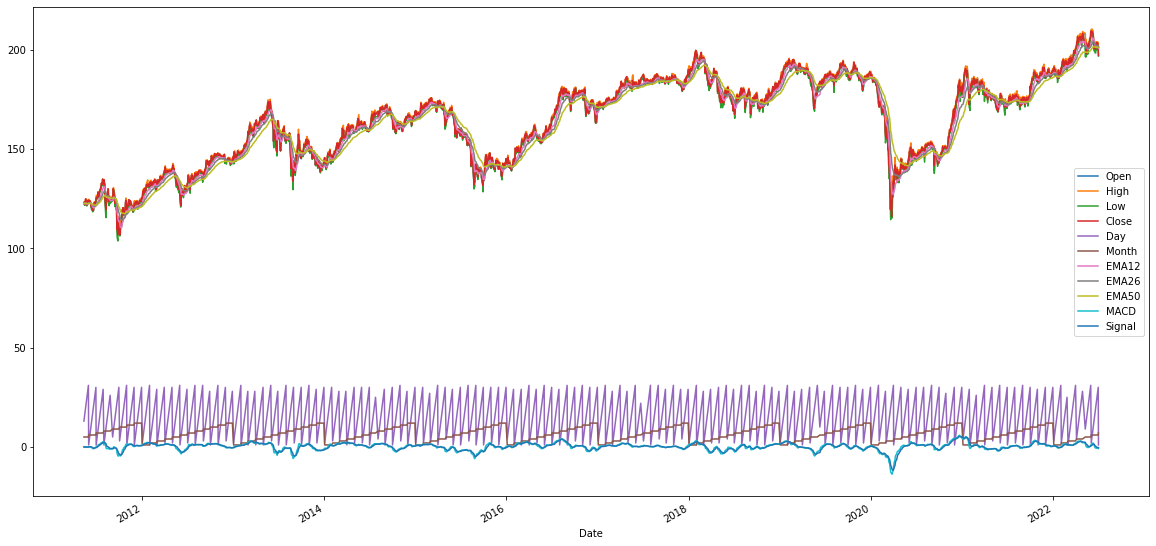

In [63]:
df.plot(figsize=(20, 10))

In [64]:
# df[["MACD", "Signal", "EMA12", "EMA26", "EMA50"]] = df[["MACD", "Signal", "EMA12", "EMA26", "EMA50"]].shift(1)

In [65]:
df.head()

,Open,High,Low,Close,Day,Month,EMA12,EMA26,EMA50,MACD,Signal
Date,,,,,,,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,13,5,122.610000,122.610000,122.610000,0.000000,0.000000
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,16,5,122.453077,122.534444,122.570000,-0.081368,-0.016274
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,18,5,122.394142,122.500041,122.550392,-0.105899,-0.034199
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,19,5,122.555043,122.569668,122.585279,-0.014624,-0.030284
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,20,5,122.749652,122.662285,122.633699,0.087367,-0.006754


In [66]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Day       0
Month     0
EMA12     0
EMA26     0
EMA50     0
MACD      0
Signal    0
dtype: int64

In [67]:
df.dropna(inplace=True)
# df.drop(columns=["up", "down", "avg_up", "avg_down", "RS"], inplace=True)

In [68]:
df.head()

,Open,High,Low,Close,Day,Month,EMA12,EMA26,EMA50,MACD,Signal
Date,,,,,,,,,,,
2011-05-13 15:00:00,122.95,123.28,122.61,122.95,13,5,122.610000,122.610000,122.610000,0.000000,0.000000
2011-05-16 15:00:00,122.03,122.94,121.59,122.03,16,5,122.453077,122.534444,122.570000,-0.081368,-0.016274
2011-05-18 15:00:00,123.46,123.59,122.07,123.46,18,5,122.394142,122.500041,122.550392,-0.105899,-0.034199
2011-05-19 15:00:00,123.81,124.16,123.44,123.81,19,5,122.555043,122.569668,122.585279,-0.014624,-0.030284
2011-05-20 15:00:00,124.84,124.84,123.82,124.84,20,5,122.749652,122.662285,122.633699,0.087367,-0.006754


In [69]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Day       0
Month     0
EMA12     0
EMA26     0
EMA50     0
MACD      0
Signal    0
dtype: int64

In [70]:
X = df.drop(columns=["Low"])
y = df["Low"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2146, 10), (537, 10), (2146,), (537,))

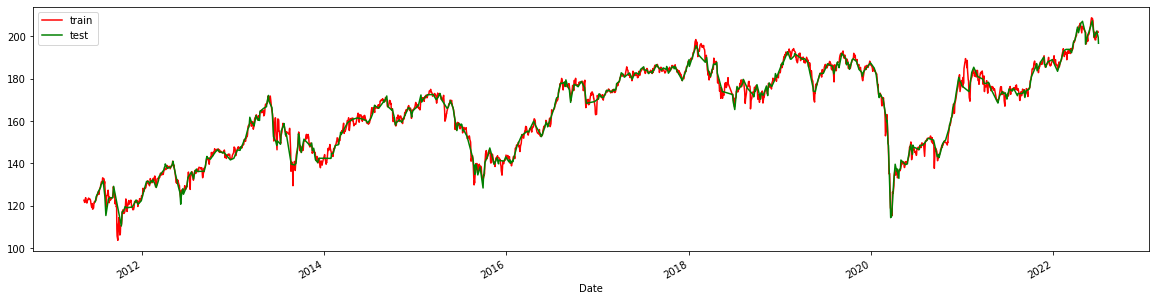

In [71]:
y_train.plot(figsize=(20, 5), label="train", color="red")
y_test.plot(figsize=(20, 5), label="test", color="green")
plt.legend()

In [72]:
y_train.values.reshape(-1, 1)

array([[174.27],
       [192.47],
       [138.81],
       ...,
       [139.42],
       [174.45],
       [164.96]])

In [73]:
X_train.columns

Index(['Open', 'High', 'Close', 'Day', 'Month', 'EMA12', 'EMA26', 'EMA50',
       'MACD', 'Signal'],
      dtype='object')

In [74]:
# from sklearn.preprocessing import PolynomialFeatures
# pf = PolynomialFeatures(degree=3, include_bias=False)

# X_train[pf.get_feature_names_out(X_train.columns)] = pf.fit_transform(X_train[X_train.columns])
# X_test[pf.get_feature_names_out(X_test.columns)] = pf.fit_transform(X_test[X_test.columns])
# X_train.head()

<AxesSubplot: xlabel='Date'>

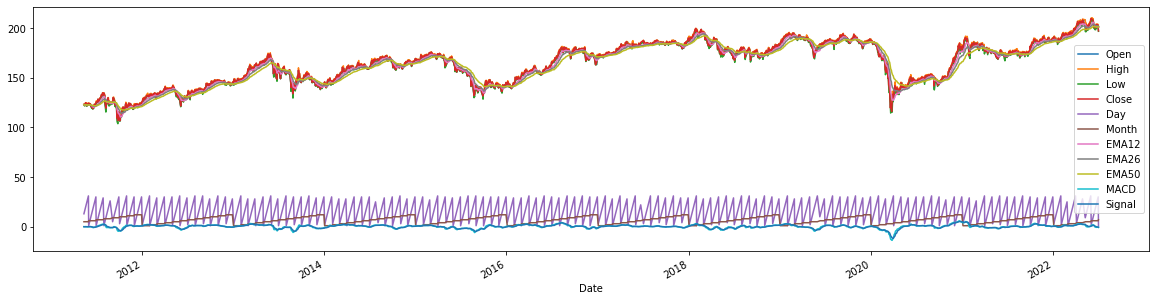

In [75]:
df.plot(figsize=(20, 5))

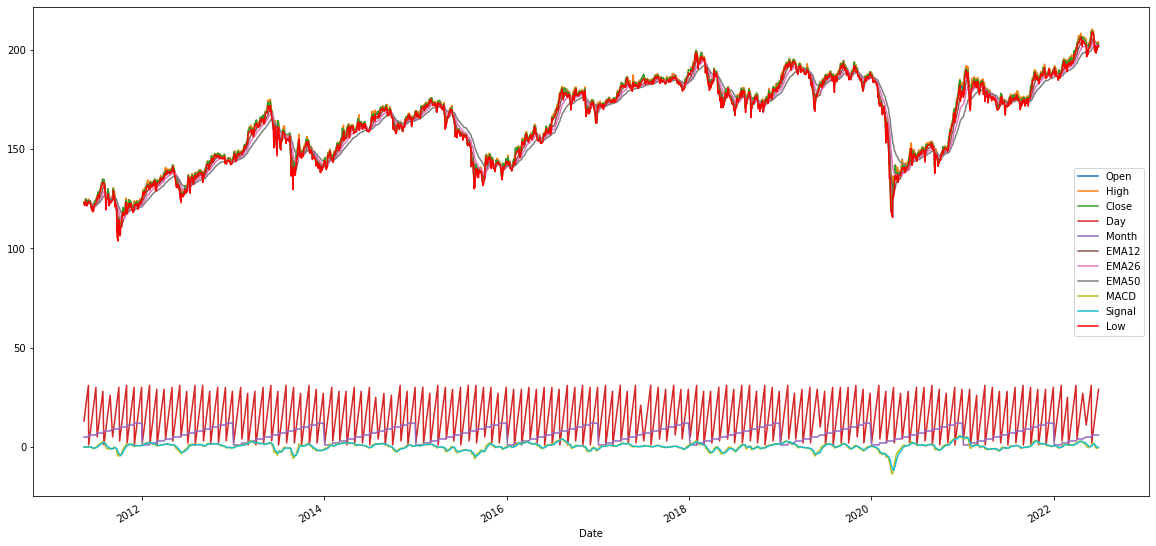

In [76]:
X_train.plot(figsize=(20, 10))
y_train.plot(figsize=(20, 10), color="red")
plt.legend()

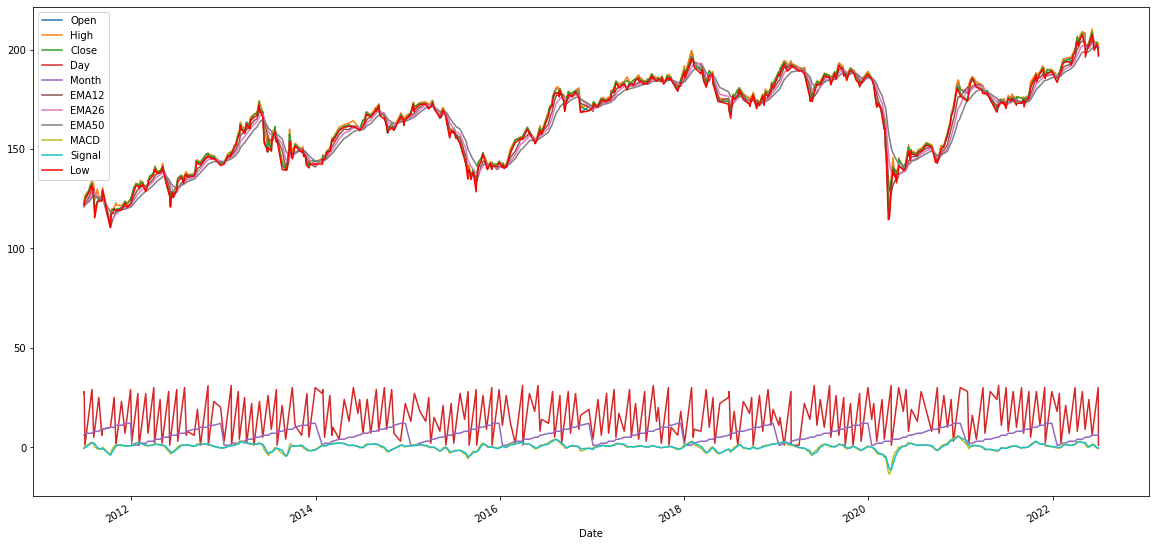

In [77]:
X_test.plot(figsize=(20, 10))
y_test.plot(figsize=(20, 10), color="red")
plt.legend()

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test), rf.score(X_train, y_train)

(0.9987608505118247, 0.9998236487133471)

In [79]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(rf, X_train, y_train, cv=3)

array([0.99882857, 0.99860102, 0.9984182 ])

In [80]:
# make regression report with cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
y_pred = cross_val_predict(rf, X_train, y_train, cv=3)
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", r2_score(y_train, y_pred))

MSE:  0.6209258401630928
R2:  0.9986097720366268


In [81]:
# regression report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_predict
def regression_report(x_train, x_test, y_train, y_test, model, algo):
    y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
    y_test_pred = cross_val_predict(model, X_test, y_test, cv=3)
    print("Regression Report " + algo)
    # print("MAE Train\t:", "{:.4f}".format(mean_absolute_error(y_train, y_train_pred)))
    # print("MAE Test\t:", "{:.4f}".format( mean_absolute_error(y_test, y_test_pred)))
    print("MSE Train\t:", "{:.4f}".format (mean_squared_error(y_train, y_train_pred)))
    print("MSE Test\t:", "{:.4f}".format (mean_squared_error(y_test, y_test_pred)))
    # print("RMSE Train\t:", "{:.4f}".format (np.sqrt(mean_squared_error(y_train, y_train_pred))))
    # print("RMSE Test\t:", "{:.4f}".format (np.sqrt(mean_squared_error(y_test, y_test_pred))))
    print("MAPE Train\t:", "{:.4f}".format (mean_absolute_percentage_error(y_train, y_train_pred)))
    print("MAPE Test\t:", "{:.4f}".format (mean_absolute_percentage_error(y_test, y_test_pred)))
    print("R2 Train\t:", "{:.4f}".format (r2_score(y_train, y_train_pred)))
    print("R2 Test\t\t:", "{:.4f}".format (r2_score(y_test, y_test_pred)))

regression_report(X_train, X_test, y_train, y_test, rf, "Random Forest")

Regression Report Random Forest
MSE Train	: 0.6209
MSE Test	: 1.0619
MAPE Train	: 0.0032
MAPE Test	: 0.0043
R2 Train	: 0.9986
R2 Test		: 0.9976


In [82]:
import time
import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.015 seconds


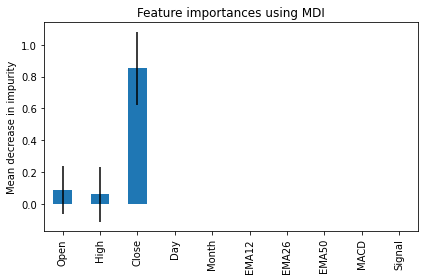

In [83]:
import pandas as pd

forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [84]:
forest_importances

Open      0.088043
High      0.060190
Close     0.851075
Day       0.000084
Month     0.000053
EMA12     0.000158
EMA26     0.000084
EMA50     0.000090
MACD      0.000113
Signal    0.000110
dtype: float64

In [85]:
from jcopml.tuning import random_search_params as rsp
rsp.rf_params

{'algo__n_estimators': Integer(low=100, high=200),
 'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20)}

In [86]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test), xgb.score(X_train, y_train)

(0.9984919299436719, 0.9999404870174775)

In [87]:
regression_report(X_train, X_test, y_train, y_test, xgb, "XGB")

Regression Report XGB
MSE Train	: 0.8015
MSE Test	: 1.6978
MAPE Train	: 0.0040
MAPE Test	: 0.0060
R2 Train	: 0.9982
R2 Test		: 0.9961


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

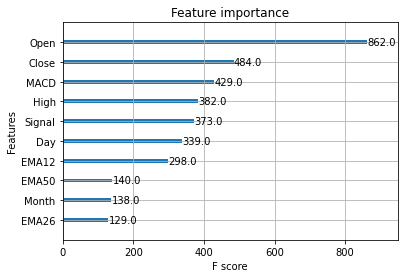

In [88]:
from xgboost import plot_importance, plot_tree
plot_importance(xgb)

In [89]:
# Regression Report Random Forest
# MSE Train	: 0.6209
# MSE Test	: 1.0619
# MAPE Train	: 0.0032
# MAPE Test	: 0.0043
# R2 Train	: 0.9986
# R2 Test		: 0.9976

# Regression Report XGB
# MSE Train	: 0.8015
# MSE Test	: 1.6978
# MAPE Train	: 0.0040
# MAPE Test	: 0.0060
# R2 Train	: 0.9982
# R2 Test		: 0.9961